In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sqlalchemy import create_engine


driver = 'mysql+pymysql:'
user = 'adria'
password = '00000'
ip = '35.187.114.125'
database = 'vimet'

connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [ ]:
items = pd.read_sql('items', con = engine)
orders = pd.read_sql('orders', con = engine)
customers = pd.read_sql('customers', con = engine)

In [ ]:
items.head()

# Items that sell well together

We will try to find the items that are best selling as a combination. To do so we will create a matrix with all the times two items appear together divided by the total number of times the item appears.

In [61]:
# We create a list with all the items we have
all_tags = list(items['tags'].unique())

# This will be the matrix to store the results
tag_matrix = []

# We iterate through the list of items
for tag_n in all_tags:
    tag_row = []

    #We find the id's of the orders where this item appears
    names_n = list(items[items['tags']==tag_n]['Name'])
    
    # For each element, we iterate through all the elements
    for tag_m in all_tags:
    
        #We find the id's of the orders where this second item appears
        names_m = list(items[items['tags']==tag_m]['Name'])
        
        #We calculate the relative frequency of the second item over the times the first item apears
        value=len(set(names_n).intersection(set(names_m)))/len(names_n)
        tag_row.append(value)
    tag_matrix.append(tag_row)

In [71]:
matrix = pd.DataFrame(tag_matrix, columns=all_tags)

In [73]:
matrix['item'] = all_tags
matrix = matrix.set_index('item')

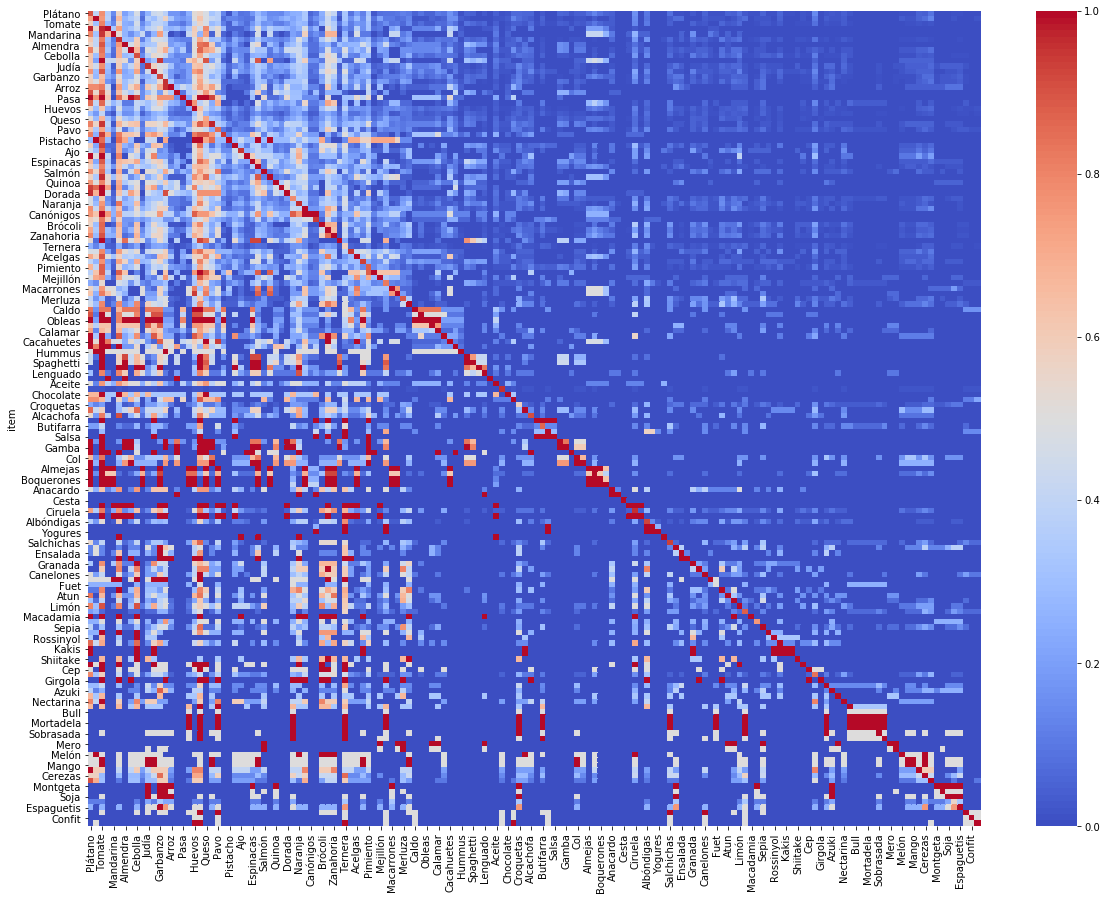

In [74]:
plt.figure(figsize=(20,15))
cmap = sns.color_palette("coolwarm", 128)
sns.heatmap(matrix, cmap=cmap)

plt.show()